In [8]:
from __future__ import division
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_excel('Education_and_Climate.xlsx', sheet_name = 'Pivot_Month')

In [10]:
df = df.dropna(subset = ["Country Name","Female_Literacy_Rate", "Goal2", "Year"])
df.head()

,Country Name,Goal2,Year,Female_Literacy_Rate,Female_School_Enrollment_5y_offset,Female_School_Enrollment_6y_offset,Female_School_Enrollment_7y_offset,Female_School_Enrollment_8y_offset,Female_School_Enrollment_9y_offset,Female_School_Enrollment_10y_offset,...,March,April,May,June,July,August,September,October,November,December
4,Afghanistan,8.6,2004,14.4,20.5,23.6,26.7,29.7,32.8,33.2,...,3.224,1.221,1.781,1.011,0.171,0.946,1.131,-0.793,3.340,0.416
5,Afghanistan,8.7,2005,14.8,23.6,26.7,29.7,32.8,33.2,32.9,...,1.869,0.313,-0.826,0.760,1.025,0.471,2.146,1.593,0.624,1.113
6,Afghanistan,8.8,2006,15.1,26.7,29.7,32.8,33.2,32.9,33.8,...,2.269,1.586,4.394,1.055,1.382,1.054,0.524,3.913,1.867,-1.982
7,Afghanistan,8.9,2007,15.5,29.7,32.8,33.2,32.9,33.8,35.1,...,0.086,3.325,1.750,1.212,0.333,0.516,0.606,-1.426,2.613,-0.772
8,Afghanistan,9.0,2008,15.9,32.8,33.2,32.9,33.8,35.1,36.7,...,4.560,1.611,2.834,2.577,1.324,0.862,1.158,1.961,0.487,0.784


In [11]:
df = df.drop(columns=['UN_Member'])

In [12]:
df = df.rename(columns={'Female_School_Enrollment_5y_offset':'offset_5y', 
                        'Female_School_Enrollment_6y_offset':'offset_6y',
                       'Female_School_Enrollment_7y_offset': 'offset_7y', 
                        'Female_School_Enrollment_8y_offset':'offset_8y',
                        'Female_School_Enrollment_9y_offset': 'offset_9y',
                        'Female_School_Enrollment_10y_offset': 'offset_10y',
                        'Female_School_Enrollment_AVG_offset': 'AVG_offset'})

In [13]:
df.head()

,Country Name,Goal2,Year,Female_Literacy_Rate,offset_5y,offset_6y,offset_7y,offset_8y,offset_9y,offset_10y,...,March,April,May,June,July,August,September,October,November,December
4,Afghanistan,8.6,2004,14.4,20.5,23.6,26.7,29.7,32.8,33.2,...,3.224,1.221,1.781,1.011,0.171,0.946,1.131,-0.793,3.340,0.416
5,Afghanistan,8.7,2005,14.8,23.6,26.7,29.7,32.8,33.2,32.9,...,1.869,0.313,-0.826,0.760,1.025,0.471,2.146,1.593,0.624,1.113
6,Afghanistan,8.8,2006,15.1,26.7,29.7,32.8,33.2,32.9,33.8,...,2.269,1.586,4.394,1.055,1.382,1.054,0.524,3.913,1.867,-1.982
7,Afghanistan,8.9,2007,15.5,29.7,32.8,33.2,32.9,33.8,35.1,...,0.086,3.325,1.750,1.212,0.333,0.516,0.606,-1.426,2.613,-0.772
8,Afghanistan,9.0,2008,15.9,32.8,33.2,32.9,33.8,35.1,36.7,...,4.560,1.611,2.834,2.577,1.324,0.862,1.158,1.961,0.487,0.784


In [19]:
low = df[df.Income_Group == 'Low income']
low.head()

,Country Name,Goal2,Year,Female_Literacy_Rate,offset_5y,offset_6y,offset_7y,offset_8y,offset_9y,offset_10y,...,March,April,May,June,July,August,September,October,November,December
4,Afghanistan,8.6,2004,14.4,20.5,23.6,26.7,29.7,32.8,33.2,...,3.224,1.221,1.781,1.011,0.171,0.946,1.131,-0.793,3.340,0.416
5,Afghanistan,8.7,2005,14.8,23.6,26.7,29.7,32.8,33.2,32.9,...,1.869,0.313,-0.826,0.760,1.025,0.471,2.146,1.593,0.624,1.113
6,Afghanistan,8.8,2006,15.1,26.7,29.7,32.8,33.2,32.9,33.8,...,2.269,1.586,4.394,1.055,1.382,1.054,0.524,3.913,1.867,-1.982
7,Afghanistan,8.9,2007,15.5,29.7,32.8,33.2,32.9,33.8,35.1,...,0.086,3.325,1.750,1.212,0.333,0.516,0.606,-1.426,2.613,-0.772
8,Afghanistan,9.0,2008,15.9,32.8,33.2,32.9,33.8,35.1,36.7,...,4.560,1.611,2.834,2.577,1.324,0.862,1.158,1.961,0.487,0.784


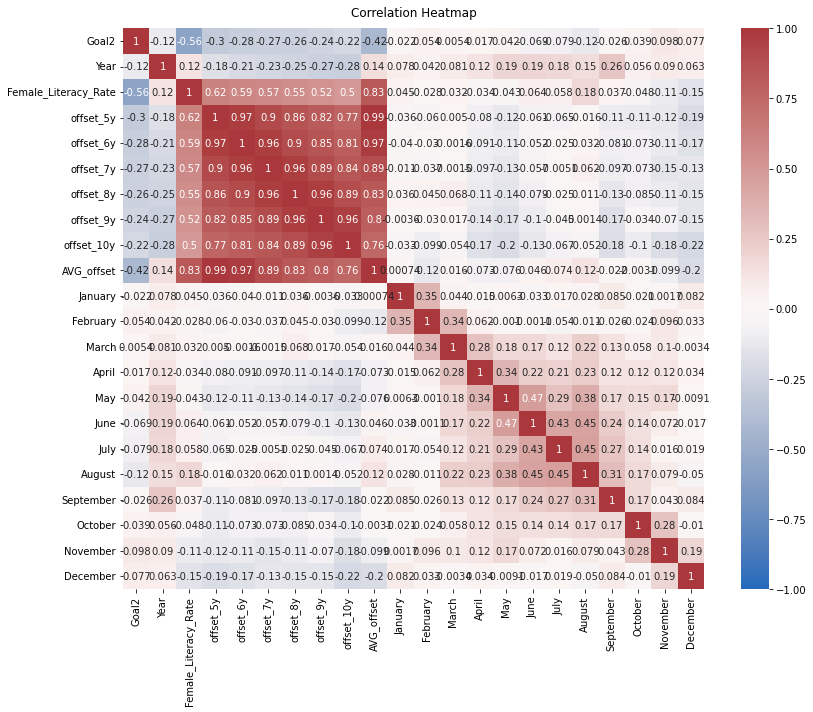

In [20]:
# Increase the size of the heatmap.
plt.figure(figsize=(12, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.tight_layout()


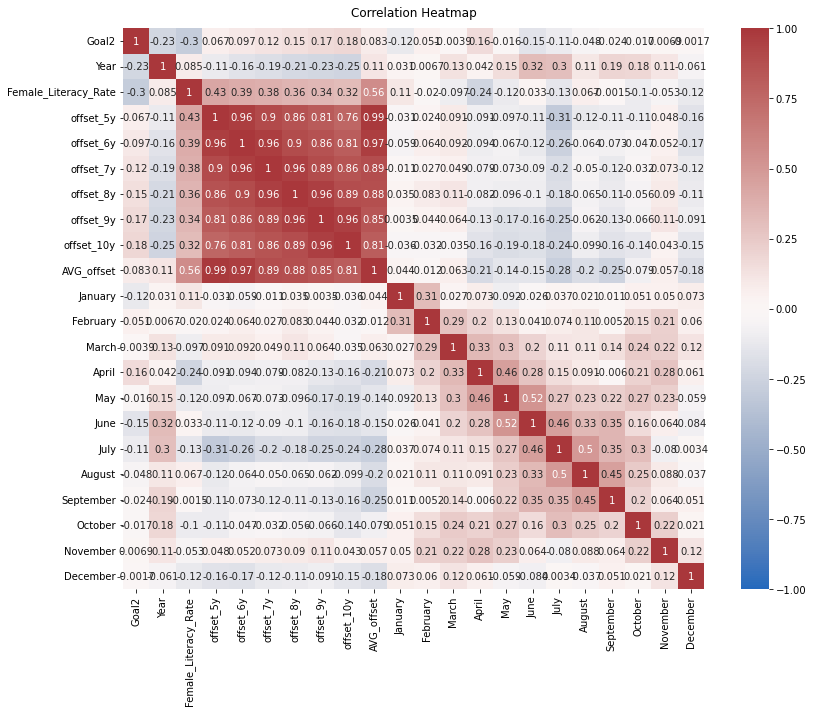

In [21]:
# Increase the size of the heatmap.
plt.figure(figsize=(12, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(low.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.tight_layout()

In [22]:
# In consideration of possible bias in different scaling, we will apply standard scaler to standardizing all usefull columns.
# I have tried various ways dealing with enrollemnt rate but not ideal, but we can still see the the average enrollemnt offset may be a potential option.
# So for now the useful columns that we are going to use are:
# Year	Female_Literacy_Rate	Enrollment_AVG_offset	Goal2	Climate_Data.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [23]:
target_col = low.drop(columns=['Country Name','Income_Group','Region'])
target_col.head()


,Goal2,Year,Female_Literacy_Rate,offset_5y,offset_6y,offset_7y,offset_8y,offset_9y,offset_10y,AVG_offset,...,March,April,May,June,July,August,September,October,November,December
4,8.6,2004,14.4,20.5,23.6,26.7,29.7,32.8,33.2,33.0,...,3.224,1.221,1.781,1.011,0.171,0.946,1.131,-0.793,3.340,0.416
5,8.7,2005,14.8,23.6,26.7,29.7,32.8,33.2,32.9,33.0,...,1.869,0.313,-0.826,0.760,1.025,0.471,2.146,1.593,0.624,1.113
6,8.8,2006,15.1,26.7,29.7,32.8,33.2,32.9,33.8,33.2,...,2.269,1.586,4.394,1.055,1.382,1.054,0.524,3.913,1.867,-1.982
7,8.9,2007,15.5,29.7,32.8,33.2,32.9,33.8,35.1,33.6,...,0.086,3.325,1.750,1.212,0.333,0.516,0.606,-1.426,2.613,-0.772
8,9.0,2008,15.9,32.8,33.2,32.9,33.8,35.1,36.7,34.1,...,4.560,1.611,2.834,2.577,1.324,0.862,1.158,1.961,0.487,0.784


In [24]:
x = target_col.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
target_col=pd.DataFrame(x_scaled, columns=target_col.columns)

In [25]:
target_col.head()

,Goal2,Year,Female_Literacy_Rate,offset_5y,offset_6y,offset_7y,offset_8y,offset_9y,offset_10y,AVG_offset,...,March,April,May,June,July,August,September,October,November,December
0,0.300885,0.210526,0.025143,0.257325,0.296815,0.336306,0.374522,0.414013,0.419108,0.354930,...,0.659138,0.552626,0.562678,0.524122,0.196272,0.404414,0.470889,0.118562,0.973045,0.482772
1,0.305310,0.263158,0.029714,0.296815,0.336306,0.374522,0.414013,0.419108,0.415287,0.354930,...,0.457801,0.359558,0.126360,0.467271,0.508406,0.256761,0.759159,0.565462,0.313502,0.617693
2,0.309735,0.315789,0.033143,0.336306,0.374522,0.414013,0.419108,0.415287,0.426752,0.357746,...,0.517236,0.630236,1.000000,0.534088,0.638889,0.437986,0.298495,1.000000,0.615347,0.018583
3,0.314159,0.368421,0.037714,0.374522,0.414013,0.419108,0.415287,0.426752,0.443312,0.363380,...,0.192868,1.000000,0.557490,0.569649,0.255482,0.270749,0.321784,0.000000,0.796503,0.252807
4,0.318584,0.421053,0.042286,0.414013,0.419108,0.415287,0.426752,0.443312,0.463694,0.370423,...,0.857652,0.635552,0.738912,0.878822,0.617690,0.378303,0.478557,0.634388,0.280233,0.554007


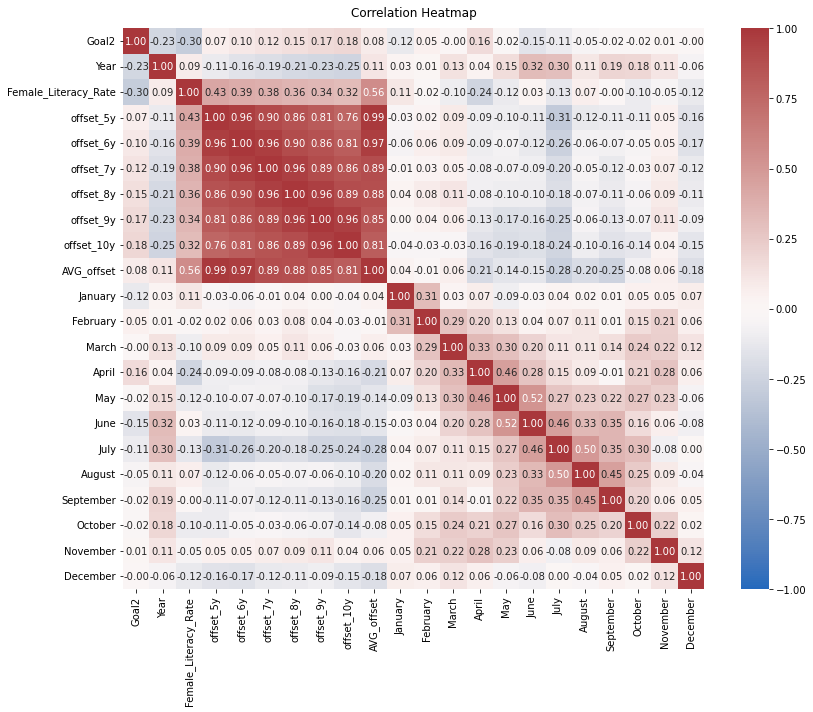

In [26]:
# Increase the size of the heatmap.
plt.figure(figsize=(12, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(target_col.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='vlag')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.tight_layout()


In [27]:
lin_reg_base = smf.ols(formula = 'Goal2 ~ Female_Literacy_Rate + Year', data = target_col).fit()
lin_reg_ed = smf.ols(formula = 'Goal2 ~ Female_Literacy_Rate + AVG_offset + Year', data = target_col).fit()
lin_reg_cl = smf.ols(formula = 'Goal2 ~ Female_Literacy_Rate + January + February + March + April + May + June + July + August + September + October + November + December + Year', 
                  data = target_col).fit()
lin_reg_all = smf.ols('Goal2 ~Female_Literacy_Rate + offset_5y +offset_6y +offset_7y +offset_8y +offset_9y +offset_10y +January + February + March + April + May + June + July + August + September + October + November + December + Year', data = target_col).fit()

In [28]:
sm.stats.anova_lm(lin_reg_base, lin_reg_ed)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,13.354723,0.0,NaN,NaN,NaN
1,241.0,6.717922,261.0,6.636801,0.912222,0.766833


In [29]:
sm.stats.anova_lm(lin_reg_base, lin_reg_cl)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,13.354723,0.0,NaN,NaN,NaN
1,488.0,12.463742,14.0,0.890981,2.491791,0.001991


In [30]:
sm.stats.anova_lm(lin_reg_base, lin_reg_all)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,13.354723,0.0,NaN,NaN,NaN
1,228.0,6.300210,274.0,7.054513,0.931743,0.712785


In [31]:
sm.stats.anova_lm(lin_reg_cl, lin_reg_all)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,488.0,12.463742,0.0,NaN,NaN,NaN
1,228.0,6.300210,260.0,6.163532,0.857899,0.884442


In [32]:
print(lin_reg_cl.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goal2   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     8.017
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.76e-15
Time:                        20:24:14   Log-Likelihood:                 216.26
No. Observations:                 503   AIC:                            -402.5
Df Residuals:                     488   BIC:                            -339.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5997 

In [33]:
for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    # data[month + '_abs'] = data[month].abs()
    target_col[month + '_abs'] = target_col[month].abs();
    
lin_reg_cl_abs = smf.ols(formula = 'Goal2 ~ Female_Literacy_Rate + Year +' \
                         ' January_abs + February_abs + March_abs + April_abs + ' \
                         ' May_abs + June_abs + July_abs + August_abs + September_abs ' \
                         ' + October_abs + November_abs + December_abs', 
                         data = target_col).fit()
    
print(lin_reg_cl_abs.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goal2   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     8.017
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.76e-15
Time:                        20:24:20   Log-Likelihood:                 216.26
No. Observations:                 503   AIC:                            -402.5
Df Residuals:                     488   BIC:                            -339.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5997 

In [34]:
target_col['avg_ab_cl'] = target_col.iloc[:,26:38].mean(axis = 1)

In [35]:
lin_reg_avg_cl = smf.ols(formula = 'Goal2 ~ Female_Literacy_Rate + avg_ab_cl + Year', data = target_col).fit()
print(lin_reg_avg_cl.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goal2   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     25.58
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.07e-15
Time:                        20:24:23   Log-Likelihood:                 201.60
No. Observations:                 505   AIC:                            -395.2
Df Residuals:                     501   BIC:                            -378.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5298 

In [36]:
target_col['Prediction'] = lin_reg_cl.predict(target_col)

In [44]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

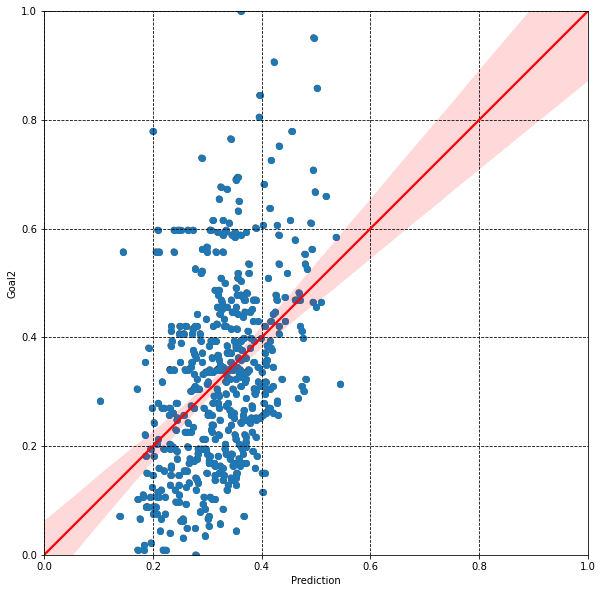

In [66]:
fig = plt.figure(figsize=(10,10)) # default is (8,6)
ax = fig.add_subplot(111, aspect='equal')
x = target_col.Prediction
y = target_col.Goal2
colors = ['k']*len(x)
ax.scatter(x, y, c=colors, alpha=0.5)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(x, y)
plt.grid(True)
plt.xlabel("Standardized Predicted Values for Proxies")
plt.ylabel("Standardized SDG 2.2.2 Values")
sns.regplot(x=x, y=y, line_kws={"color": "red"}, truncate=False)
plt.show()

In [68]:
# Now we will run the OLS regression
lm1 = smf.ols(formula = "Goal2~ Year +January + Febraury + March + April + May + June + July + August + September + October + November + December + AVG_offset + Female_Literacy_Rate", data = target_col).fit()
print (lm1.summary())

PatsyError: Error evaluating factor: NameError: name 'Febraury' is not defined
    Goal2~ Year +January + Febraury + March + April + May + June + July + August + September + October + November + December + AVG_offset + Female_Literacy_Rate
                           ^^^^^^^^

In [14]:
lm2 = smf.ols(formula = "Goal2~ Enrollment_AVG_offset + Female_Literacy_Rate+Year", data = target_col).fit()
print (lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goal2   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           9.59e-74
Time:                        20:41:20   Log-Likelihood:                 269.03
No. Observations:                 731   AIC:                            -530.1
Df Residuals:                     727   BIC:                            -511.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.57

In [ ]:
# Now we will include the interacting effect between month and climate data.


In [145]:
lm3 = smf.ols(formula = "Goal2~ Month*Climate_Data + Month + Climate_Data + Year + Enrollment_AVG_offset + Female_Literacy_Rate", data = target_col).fit()
print (lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goal2   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     877.6
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:15:31   Log-Likelihood:                 3232.0
No. Observations:                8772   AIC:                            -6450.
Df Residuals:                    8765   BIC:                            -6400.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.51

The result seemed insignificant

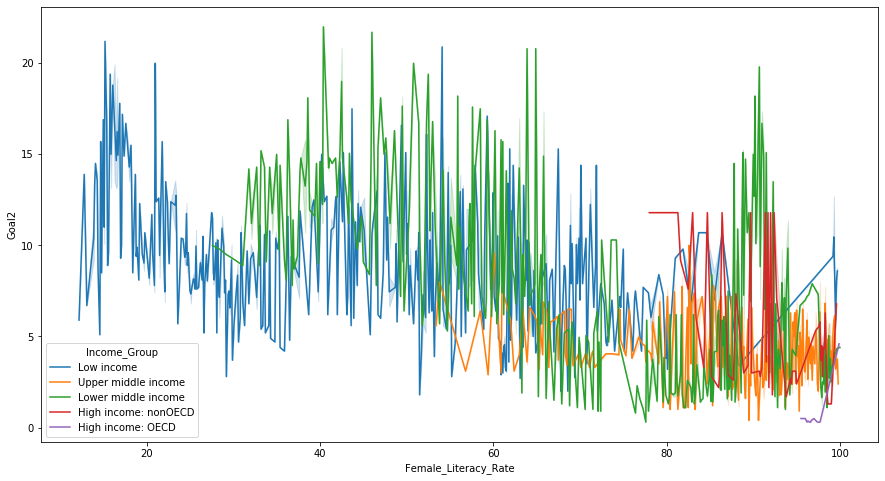

In [124]:
# MORE VISUALIZATIONS
# BY INCOME GROUP
# We are using df instead of arget_col as there is not need for scaling to see the trend.
plt.figure(figsize = (15,8))
sns.lineplot(x='Female_Literacy_Rate', y='Goal2', hue='Income_Group', data=df)

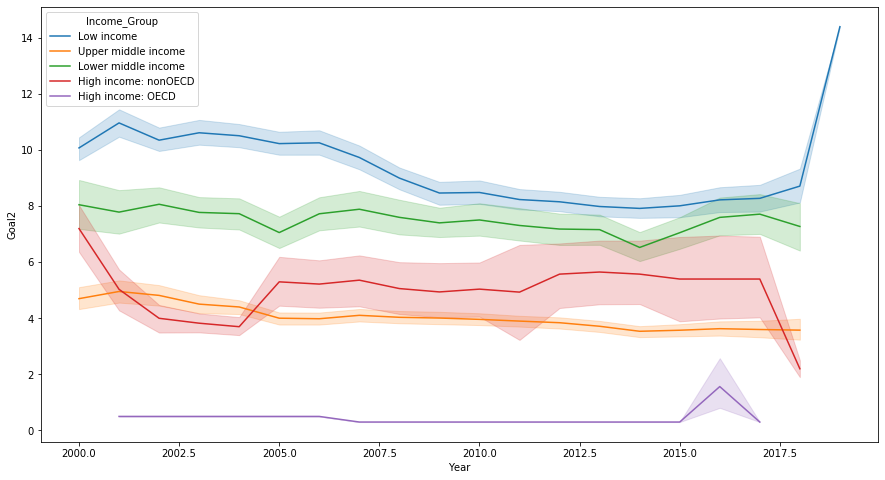

In [125]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Year', y='Goal2', hue='Income_Group', data=df)

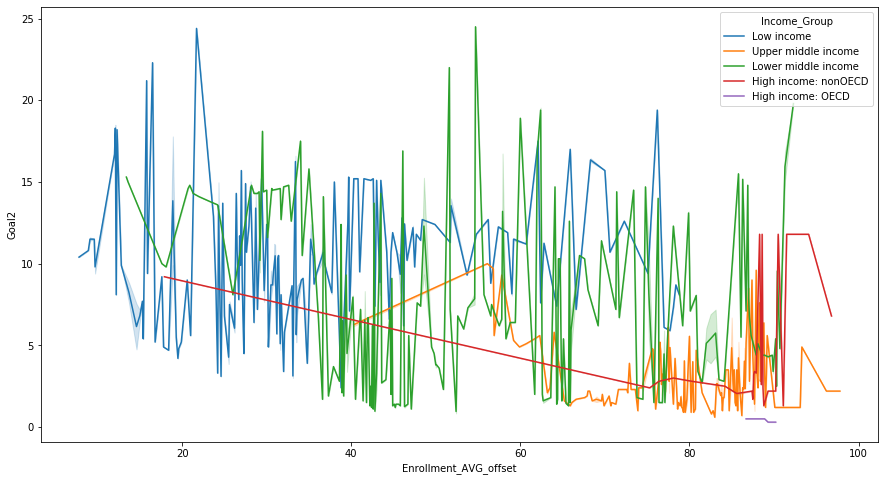

In [126]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Enrollment_AVG_offset', y='Goal2', hue='Income_Group', data=df)

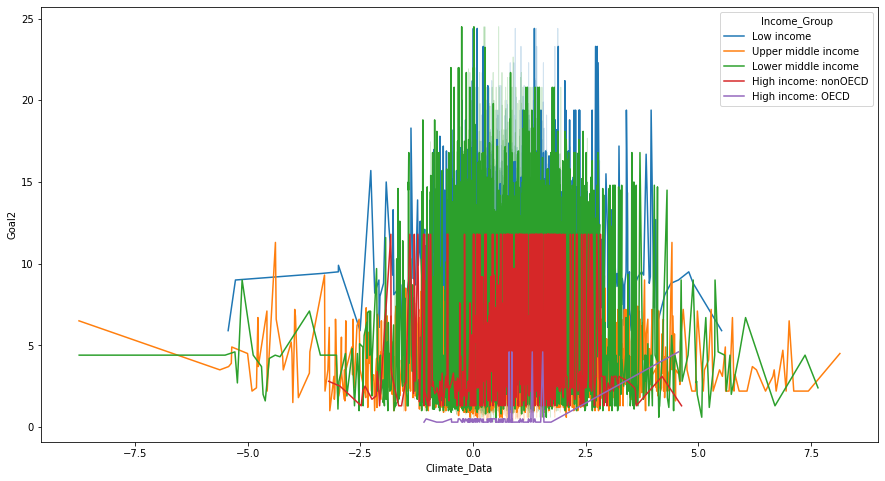

In [127]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Climate_Data', y='Goal2', hue='Income_Group', data=df)

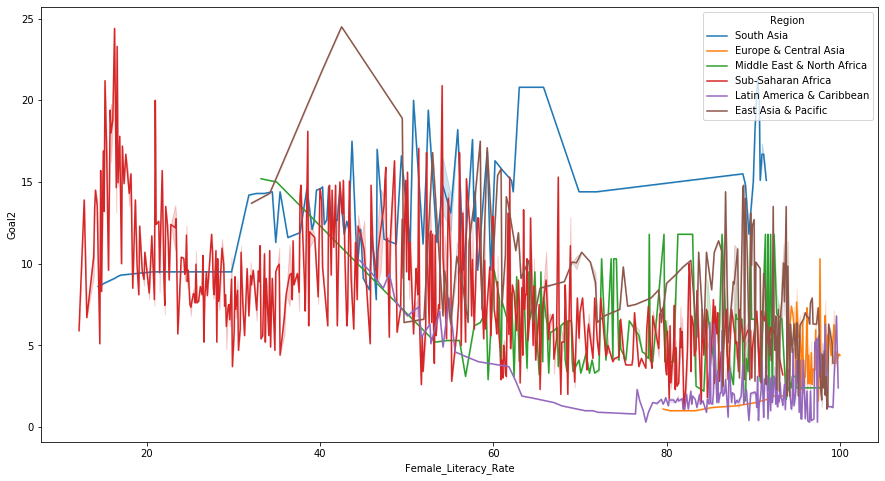

In [128]:
# BY REGION
plt.figure(figsize = (15,8))
sns.lineplot(x='Female_Literacy_Rate', y='Goal2', hue='Region', data=df)

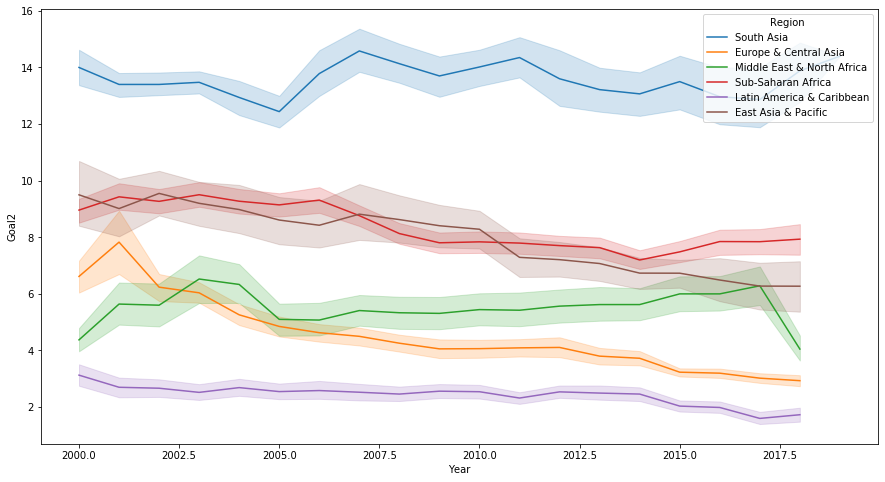

In [129]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Year', y='Goal2', hue='Region', data=df)

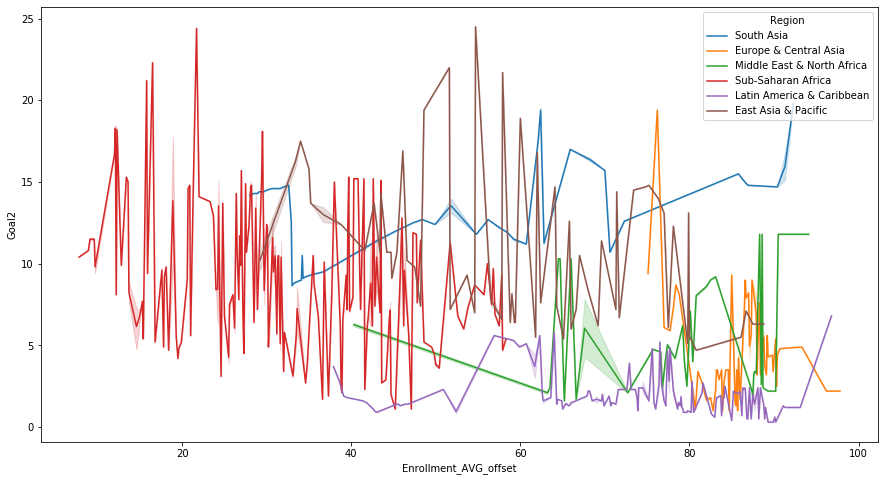

In [130]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Enrollment_AVG_offset', y='Goal2', hue='Region', data=df)

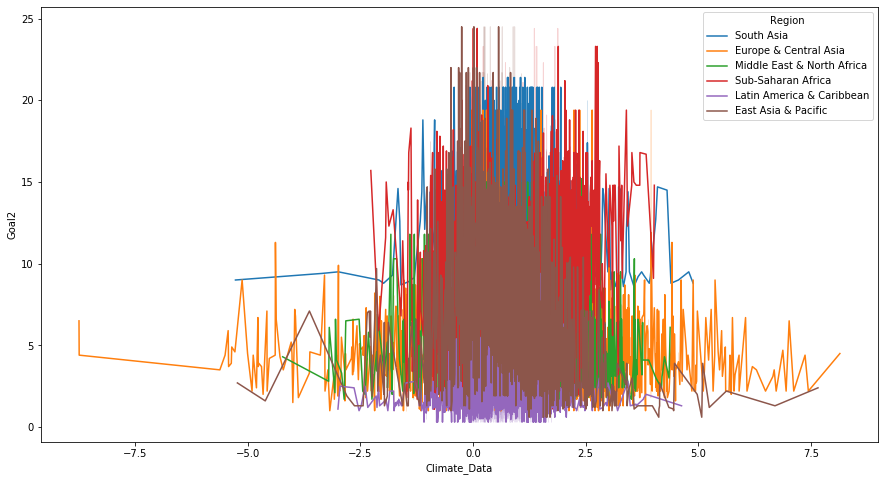

In [131]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Climate_Data', y='Goal2', hue='Region', data=df)

# Targeting countries Only

In [69]:
target = df.loc[(df['Country Name'] == 'Barbados')
                | (df['Country Name'] == 'Indonesia')
               | (df['Country Name'] == 'Malawi')
               | (df['Country Name'] == 'Rwanda')
               | (df['Country Name'] == 'Uzbekistan')
               | (df['Country Name'] == 'Cambodia')]
               
target.head()

,Country Name,Goal2,Year,Female_Literacy_Rate,offset_5y,offset_6y,offset_7y,offset_8y,offset_9y,offset_10y,...,March,April,May,June,July,August,September,October,November,December
292,Barbados,6.8,2012,99.6,97.6,96.8,64.5,32.3,NaN,NaN,...,0.371,0.355,0.069,0.717,0.922,0.491,0.993,0.852,1.145,0.922
293,Barbados,6.8,2013,99.6,96.8,64.5,32.3,NaN,NaN,NaN,...,1.002,0.449,0.392,0.461,0.831,0.679,0.933,0.764,0.656,0.474
294,Barbados,6.8,2014,99.6,64.5,32.3,NaN,NaN,NaN,NaN,...,0.337,0.509,0.374,0.817,0.739,0.415,0.756,0.757,0.715,0.928
560,Cambodia,17.1,2000,59.3,26.6,29.9,33.7,36.7,33.8,31.0,...,0.388,-0.279,-0.060,-0.011,-0.040,0.377,0.330,0.130,0.276,1.102
561,Cambodia,15.4,2001,60.5,29.9,33.7,36.7,33.8,31.0,28.2,...,0.111,0.992,0.145,0.018,0.625,0.346,0.831,0.592,-0.553,0.665


In [70]:
target_col2 = target.drop(columns=['Country Name', 'offset_5y','offset_6y','offset_7y',
                             'offset_8y','offset_9y','offset_10y','Income_Group','Region'])
target_col2.head()

,Goal2,Year,Female_Literacy_Rate,AVG_offset,January,February,March,April,May,June,July,August,September,October,November,December
292,6.8,2012,99.6,96.8,0.660,0.452,0.371,0.355,0.069,0.717,0.922,0.491,0.993,0.852,1.145,0.922
293,6.8,2013,99.6,96.8,0.653,0.793,1.002,0.449,0.392,0.461,0.831,0.679,0.933,0.764,0.656,0.474
294,6.8,2014,99.6,NaN,0.535,0.600,0.337,0.509,0.374,0.817,0.739,0.415,0.756,0.757,0.715,0.928
560,17.1,2000,59.3,33.4,1.334,0.101,0.388,-0.279,-0.060,-0.011,-0.040,0.377,0.330,0.130,0.276,1.102
561,15.4,2001,60.5,33.4,1.868,0.817,0.111,0.992,0.145,0.018,0.625,0.346,0.831,0.592,-0.553,0.665


In [71]:
x2 = target_col2.values #returns a numpy array
min_max_scaler2 = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler.fit_transform(x2)
target_col2=pd.DataFrame(x_scaled2, columns=target_col2.columns)

In [72]:
target_col2.head()

,Goal2,Year,Female_Literacy_Rate,AVG_offset,January,February,March,April,May,June,July,August,September,October,November,December
0,0.326797,0.666667,0.991786,1.000000,0.641735,0.515285,0.162819,0.358104,0.333598,0.523250,0.437766,0.311029,0.353430,0.494815,0.595438,0.738450
1,0.326797,0.722222,0.991786,1.000000,0.641257,0.544817,0.238306,0.370147,0.397698,0.463128,0.411965,0.380147,0.332640,0.476566,0.519553,0.683696
2,0.326797,0.777778,0.991786,NaN,0.633197,0.528103,0.158751,0.377835,0.394126,0.546736,0.385880,0.283088,0.271310,0.475114,0.528709,0.739184
3,1.000000,0.000000,0.164271,0.116992,0.687773,0.484888,0.164852,0.276874,0.307998,0.352278,0.165013,0.269118,0.123701,0.345085,0.460583,0.760450
4,0.888889,0.055556,0.188912,0.116992,0.724249,0.546895,0.131714,0.439718,0.348680,0.359089,0.353558,0.257721,0.297297,0.440896,0.331937,0.707040


In [73]:
lin_reg_base2 = smf.ols(formula = 'Goal2 ~ Female_Literacy_Rate + Year', data = target_col2).fit()
lin_reg_ed2 = smf.ols(formula = 'Goal2 ~ Female_Literacy_Rate + AVG_offset + Year', data = target_col2).fit()
lin_reg_cl2 = smf.ols(formula = 'Goal2 ~ Female_Literacy_Rate + January + February + March + April + May + June + July + August + September + October + November + December + Year', 
                  data = target_col2).fit()
lin_reg_all2 = smf.ols(formula = 'Goal2 ~ Female_Literacy_Rate + AVG_offset+January + February + March + April + May + June + July + August + September + October + November + December + Year', 
                  data = target_col2).fit()

In [74]:
sm.stats.anova_lm(lin_reg_base2, lin_reg_ed2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,87.0,5.489605,0.0,NaN,NaN,NaN
1,50.0,3.381372,37.0,2.108233,0.842547,0.704506


In [75]:
sm.stats.anova_lm(lin_reg_base2, lin_reg_cl2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,87.0,5.489605,0.0,NaN,NaN,NaN
1,75.0,3.356194,12.0,2.13341,3.972898,0.000097


In [76]:
sm.stats.anova_lm(lin_reg_base2, lin_reg_all2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,87.0,5.489605,0.0,NaN,NaN,NaN
1,38.0,1.971257,49.0,3.518347,1.384149,0.150336


In [77]:
print(lin_reg_cl2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goal2   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     4.885
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.58e-06
Time:                        20:46:37   Log-Likelihood:                 20.301
No. Observations:                  90   AIC:                            -10.60
Df Residuals:                      75   BIC:                             26.90
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9330 

In [99]:
print(lin_reg_all2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goal2   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     2.971
Date:                Mon, 29 Nov 2021   Prob (F-statistic):            0.00336
Time:                        22:01:26   Log-Likelihood:                 12.756
No. Observations:                  54   AIC:                             6.488
Df Residuals:                      38   BIC:                             38.31
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.98

In [100]:
print(lin_reg_base2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goal2   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     7.344
Date:                Mon, 29 Nov 2021   Prob (F-statistic):            0.00113
Time:                        22:01:49   Log-Likelihood:                -1.8416
No. Observations:                  90   AIC:                             9.683
Df Residuals:                      87   BIC:                             17.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3824 

In [101]:
print(lin_reg_ed2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goal2   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     4.443
Date:                Mon, 29 Nov 2021   Prob (F-statistic):            0.00762
Time:                        22:01:57   Log-Likelihood:                -1.8137
No. Observations:                  54   AIC:                             11.63
Df Residuals:                      50   BIC:                             19.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.42

In [102]:
sm.stats.anova_lm(lin_reg_base2, lin_reg_ed2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,87.0,5.489605,0.0,NaN,NaN,NaN
1,50.0,3.381372,37.0,2.108233,0.842547,0.704506


In [103]:
sm.stats.anova_lm(lin_reg_base2, lin_reg_cl2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,87.0,5.489605,0.0,NaN,NaN,NaN
1,75.0,3.356194,12.0,2.13341,3.972898,0.000097


In [104]:
sm.stats.anova_lm(lin_reg_base2, lin_reg_all2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,87.0,5.489605,0.0,NaN,NaN,NaN
1,38.0,1.971257,49.0,3.518347,1.384149,0.150336


In [78]:
target_col2['Prediction'] = lin_reg_cl2.predict(target_col2)

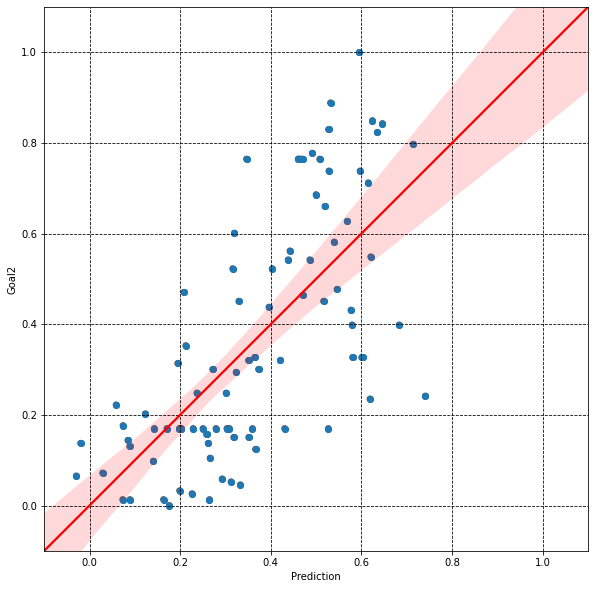

In [79]:
fig = plt.figure(figsize=(10,10)) # default is (8,6)
ax = fig.add_subplot(111, aspect='equal')
x2 = target_col2.Prediction
y2 = target_col2.Goal2
colors = ['k']*len(x2)
ax.scatter(x2, y2, c=colors, alpha=0.5)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.scatter(x2, y2)
plt.grid(True)
sns.regplot(x=x2, y=y2, line_kws={"color": "red"}, truncate=False)
plt.show()